# Correlation

**Correlation** is a statistical measure that expresses the strength and direction of a relationship between two variables. It indicates how one variable changes with respect to another. If two variables tend to change together, they are correlated. Correlation does not imply causation, but it helps to understand how variables are related to each other.


In [3]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
#from google.colab import files

In [4]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

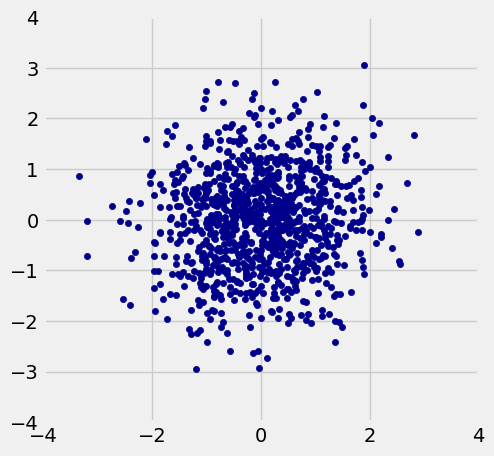

In [12]:
r_scatter(0.085)

## Approach to Prediction

In [22]:
# upload the file family_height.csv   # Note: Child heights are the **adult** heights of children in a family
# uploaded=files.upload()

In [13]:
#Read the file family_heights.csv
family_heights = pd.read_csv('C:/University/University Files/University-Code/Year 1/Semester 1/Python/Lessons/Data/csv/family_heights.csv')

In [14]:
family_heights

,family,father,mother,child,children,order,sex
0,1,78.5,67.0,73.2,4,1,male
1,1,78.5,67.0,69.2,4,2,female
2,1,78.5,67.0,69.0,4,3,female
3,1,78.5,67.0,69.0,4,4,female
4,2,75.5,66.5,73.5,4,1,male
...,...,...,...,...,...,...,...
929,203,62.0,66.0,64.0,3,1,male
930,203,62.0,66.0,62.0,3,2,female
931,203,62.0,66.0,61.0,3,3,female
932,204,62.5,63.0,66.5,2,1,male


In [16]:
# Average height of the parents
parent_average_height = (family_heights['father'] + family_heights['mother'])/2
parent_average_height

0      72.75
1      72.75
2      72.75
3      72.75
4      71.00
       ...  
929    64.00
930    64.00
931    64.00
932    62.75
933    62.75
Length: 934, dtype: float64

In [19]:
# Create a new table called heights with a column titled 'Parent Average' with values of the array parent_avgs and also another column "Child" with values from the families table's column 'child'
heights = pd.DataFrame()
heights['Parent Average'] = parent_average_height 
heights['Child'] = family_heights['child']
heights

,Parent Average,Child
0,72.75,73.2
1,72.75,69.2
2,72.75,69.0
3,72.75,69.0
4,71.00,73.5
...,...,...
929,64.00,64.0
930,64.00,62.0
931,64.00,61.0
932,62.75,66.5


Text(0, 0.5, 'Child')

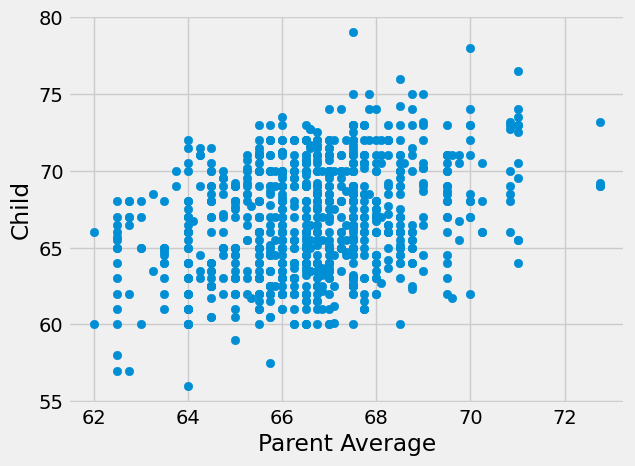

In [21]:
# PLot a Scatter plot with child on the y-axis and parent_average_height on the y-axis
plots.scatter(heights['Parent Average'], heights['Child'])
plots.xlabel('Parent Average')
plots.ylabel("Child")

Text(0, 0.5, 'Child')

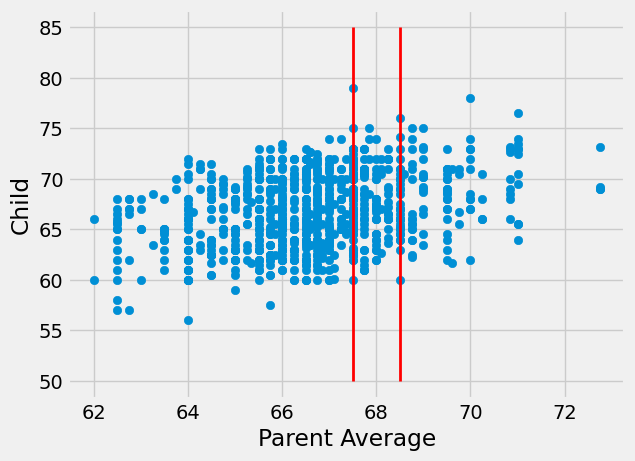

In [22]:
plots.scatter(heights['Parent Average'], heights['Child'])
plots.plot([67.5,67.5],[50,85], color='red', lw=2)
plots.plot([68.5,68.5],[50,85], color='red', lw=2)
plots.xlabel('Parent Average')
plots.ylabel("Child")

In [28]:
# Extract all the points where Paverent Average is between 67.5 and 68.5
nearby = heights.query('67.5 <= `Parent Average` <= 68.5')
nearby


,Parent Average,Child
33,68.0,74.0
34,68.0,70.0
35,68.0,68.0
36,68.0,67.0
37,68.0,67.0
...,...,...
581,67.5,68.0
582,67.5,68.0
583,67.5,68.0
584,67.5,66.2


In [30]:
nearby_mean = np.average(nearby['Child'])
nearby_mean

np.float64(67.6140909090909)

Text(0, 0.5, 'Child')

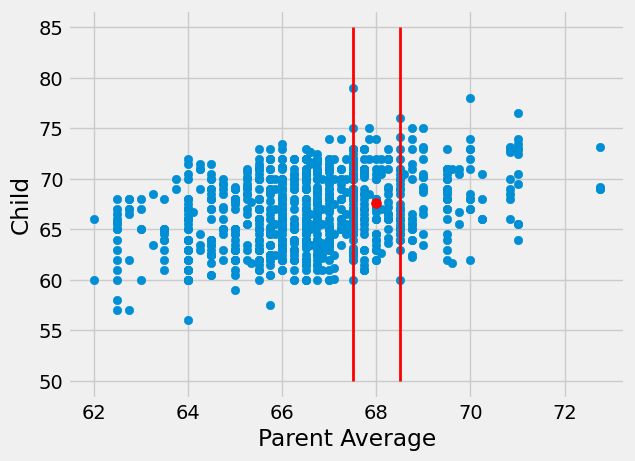

In [33]:
plots.scatter(heights['Parent Average'], heights['Child'])
plots.plot([67.5,67.5],[50,85], color='red', lw=2)
plots.plot([68.5,68.5],[50,85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50)
plots.xlabel('Parent Average')
plots.ylabel("Child")

In [34]:
def predict_child(h):
    """Predict the height of a child whose parents have a parent average height of p_avg.

    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    # Filter rows where 'Parent Average' is within the specified range
    nearby = heights[(heights['Parent Average'] >= h - 0.5) & (heights['Parent Average'] <= h + 0.5)]

    # Calculate the average height of the 'Child' column
    return np.average(nearby['Child'])


In [35]:
# Assuming `heights` is a DataFrame and 'Parent Average' is an existing column
heights['Prediction'] = heights['Parent Average'].apply(predict_child)
heights


,Parent Average,Child,Prediction
0,72.75,73.2,70.100000
1,72.75,69.2,70.100000
2,72.75,69.0,70.100000
3,72.75,69.0,70.100000
4,71.00,73.5,70.415789
...,...,...,...
929,64.00,64.0,65.080682
930,64.00,62.0,65.080682
931,64.00,61.0,65.080682
932,62.75,66.5,64.351724


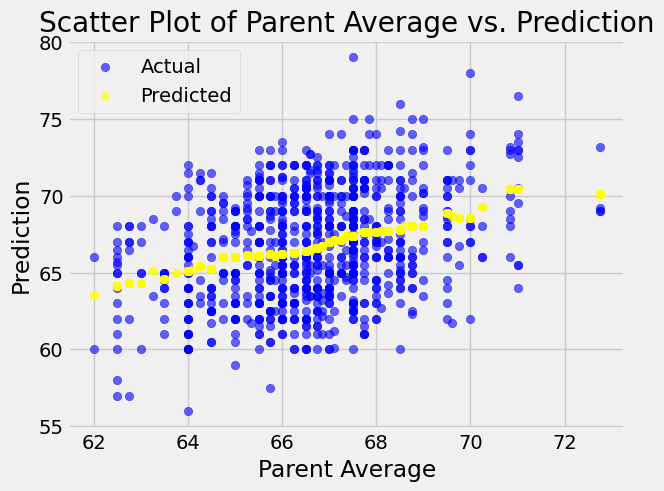

In [36]:
# Scatter plot of 'Parent Average' vs 'Prediction'
plots.scatter(heights['Parent Average'], heights['Child'], color='blue', alpha=0.6)

# Line plot of 'Parent Average' vs 'Prediction'
plots.scatter(heights['Parent Average'], heights['Prediction'], color='yellow', alpha=0.6)

# Adding labels and title
plots.xlabel('Parent Average')
plots.ylabel('Prediction')
plots.title('Scatter Plot of Parent Average vs. Prediction')
plots.legend(['Actual', 'Predicted'])
# Display the plot
plots.show()